## SETUP

In [1]:
## docker: docker_slim
source('./../../../my_utils/funcs_R/my_rutils.R')
source("./../helper_funs.r")
suppressMessages(suppressWarnings(library(RColorBrewer)))
suppressMessages(suppressWarnings(library(gplots)))
suppressMessages(suppressWarnings(library(dplyr)))

save.dir <- './figs/figs_feb_28/'

# font size for figures
fs <-  4 
fs.small <- 3

## GET DATA

In [2]:
merfish.errors <- readRDS('./merfish_mousebrain/merfish_errs_updated.RDS')
starmap.errors <- readRDS('./STARmap/starmap_errs_updated.RDS')
seqfish.errors <- readRDS('./seqFISH_kidney/seqfish_errs_updated.RDS')
cosmx.errors <- readRDS('./CosMx_liver/cosmx_errs_updated.RDS')
xenium.errors <- readRDS('./xenium/xenium_errs_updated.RDS')
all.errs <- list(merfish = merfish.errors,
                 starmap = starmap.errors,
                 seqfish = seqfish.errors,
                 cosmx = cosmx.errors,
                 xenium = xenium.errors)
datasets <- names(all.errs)

In [3]:
datasets
names(all.errs$merfish)
names(all.errs$merfish$pval.fps)
(all.errs$merfish$pval.fps)

[1] "merfish" "starmap" "seqfish" "cosmx"   "xenium"

[1] "pval.fps" "pval.fns" "lfcs.fps" "lfcs.fns" "svg.fps"  "svg.fns"

[1] "fiber_tracts"  "ventricles"    "habenula"      "dentate_gyrus"
[5] "random"

,fiber_tracts,ventricles,habenula,dentate_gyrus,random
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nonorm,0.00000000,0.008368201,0.016260163,0.017316017,0.003448276
libsize,0.04270463,0.033333333,0.028112450,0.042735043,0.010273973
deseq,0.02846975,0.025000000,0.020325203,0.034482759,0.003436426
tmm,0.03571429,0.032921811,0.008097166,0.038297872,0.017006803
volume,0.00000000,0.016949153,0.016393443,0.004464286,0.000000000
sct,0.06785714,0.057377049,0.024096386,0.059071730,0.013651877


In [4]:
n.gs <- sapply(all.errs, function(x) {length(x[[1]])})
sum(sapply(all.errs, function(x) {length(x[[1]])}))
panel.names <- unlist(sapply(datasets, function(curr.d) {
    curr.panels <- names(all.errs[[curr.d]][[1]])
    curr.names <- paste0(rep(curr.d, length(curr.panels)), '_', curr.panels)
    curr.names
}))
panel.names
length(panel.names)

[1] 19

merfish1                merfish2                merfish3 
 "merfish_fiber_tracts"    "merfish_ventricles"      "merfish_habenula" 
               merfish4                merfish5                starmap1 
"merfish_dentate_gyrus"        "merfish_random"  "starmap_fiber_tracts" 
               starmap2                starmap3                starmap4 
   "starmap_ventricles" "starmap_dentate_gyrus"        "starmap_random" 
               seqfish1                seqfish2                seqfish3 
       "seqfish_cortex"       "seqfish_medulla"        "seqfish_pelvis" 
               seqfish4                  cosmx1                  cosmx2 
       "seqfish_random"          "cosmx_Zone 3"          "cosmx_Zone 1" 
                 cosmx3                 xenium1                 xenium2 
         "cosmx_random"       "xenium_invasive"           "xenium_dcis" 
                xenium3 
        "xenium_random"

[1] 19

In [5]:
norms.order <- c('libsize', 'sct', 'deseq', 'tmm', 'volume', 'area', 'nonorm')
names(norms.order) <- c('Library Size', 'scTransform', 'DESeq2', 'TMM', 
                        'Cell Volume', 'Cell Area', 'No Normalization')
panels.order <- c('merfish_ventricles','merfish_habenula','merfish_fiber_tracts', 'merfish_dentate_gyrus',
                  'starmap_ventricles', 'starmap_fiber_tracts', 'starmap_dentate_gyrus', 
                  'seqfish_cortex','seqfish_medulla','seqfish_pelvis',
                  'cosmx_Zone 1','cosmx_Zone 3', 
                  'xenium_dcis','xenium_invasive',
                  'merfish_random','starmap_random','seqfish_random','cosmx_random','xenium_random')
names(panels.order) <- c('Ventricles', 'Habenula', 'Fiber tracts', 'Dentate gyrus',
                         'Ventricles', 'Fiber tracts', 'Dentate gyrus', 
                         'Cortex', 'Medulla', 'Pelvis',
                         'Zone 1', 'Zone 3',
                         'DCIS', 'Invasive carcinoma', 
                         'MERFISH Random','STARmapPLUS Random','seqFISH Random','CosMx Random','10X Xenium Random')

In [6]:
pval.fns <- lapply(datasets, function(curr.data) {
    data.frame(t(all.errs[[curr.data]][['pval.fns']]))
})
names(pval.fns) <- datasets
pval.fns <- bind_rows(pval.fns)
rownames(pval.fns) <- panel.names
pval.fns <- pval.fns[,norms.order]
pval.fns <- pval.fns[panels.order,]
colnames(pval.fns) <- names(norms.order)

In [7]:
pval.fps <- lapply(datasets, function(curr.data) {
    data.frame(t(all.errs[[curr.data]][['pval.fps']]))
})
names(pval.fps) <- datasets
pval.fps <- bind_rows(pval.fps)
rownames(pval.fps) <- panel.names
pval.fps <- pval.fps[,norms.order]
pval.fps <- pval.fps[panels.order,]
colnames(pval.fps) <- names(norms.order)

In [8]:
lfc.sns <- lapply(datasets, function(curr.data) {
    data.frame(t(all.errs[[curr.data]][['lfcs.fns']]))
})
names(lfc.sns) <- datasets
lfc.sns <- bind_rows(lfc.sns)
rownames(lfc.sns) <- panel.names
lfc.sns <- lfc.sns[,norms.order]
lfc.sns <- lfc.sns[panels.order,]
colnames(lfc.sns) <- names(norms.order)

In [9]:
lfc.sps <- lapply(datasets, function(curr.data) {
    data.frame(t(all.errs[[curr.data]][['lfcs.fps']]))
})
names(lfc.sps) <- datasets
lfc.sps <- bind_rows(lfc.sps)
rownames(lfc.sps) <- panel.names
lfc.sps <- lfc.sps[,norms.order]
lfc.sps <- lfc.sps[panels.order,]
colnames(lfc.sps) <- names(norms.order)

In [46]:
panel.div <- readRDS('panel_divs.RDS')
panel.div <- unlist(lapply(panel.div, function(x) {
    x[1:(length(x)-1)]
}))
# length(panel.div)
names(panel.div) <- panel.names

In [17]:
max(all.errs$merfish$lfcs.fps[,'ventricles'])

[1] 0.1888412

In [18]:
all.errs$cosmx$pval.fps

,Zone 3,Zone 1,random
,<dbl>,<dbl>,<dbl>
nonorm,0.000000000,0.000000000,0.00000000
libsize,0.000000000,0.042857143,0.01834862
deseq,0.000000000,0.009302326,0.00000000
tmm,0.000000000,0.037735849,0.02727273
area,0.004784689,0.000000000,0.00000000
sct,0.015000000,0.062200957,0.01834862


## DIV VS ERR RATE

In [47]:
pval.fns[6:19,]

,Library Size,scTransform,DESeq2,TMM,Cell Volume,Cell Area,No Normalization
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
starmap_fiber_tracts,0.12380952,0.10476190,0.03703704,0.04854369,NA,NA,0
starmap_dentate_gyrus,0.04901961,0.04950495,0.00990099,0.04807692,NA,NA,0
seqfish_cortex,0.07000000,0.11224490,0.03921569,0.07843137,NA,0.00000000,0
seqfish_medulla,0.15533981,0.15151515,0.03883495,0.17307692,NA,0.00000000,0
seqfish_pelvis,0.23750000,0.27631579,0.08139535,0.14606742,NA,0.01136364,0
cosmx_Zone 1,0.16842105,0.17801047,0.07567568,0.14893617,NA,0.00000000,0
cosmx_Zone 3,0.04000000,0.04500000,0.00000000,0.00500000,NA,0.00000000,0
xenium_dcis,0.11688312,0.17721519,0.07594937,0.05063291,NA,0.00000000,0
xenium_invasive,0.15189873,0.18987342,0.02531646,0.03750000,NA,0.00000000,0


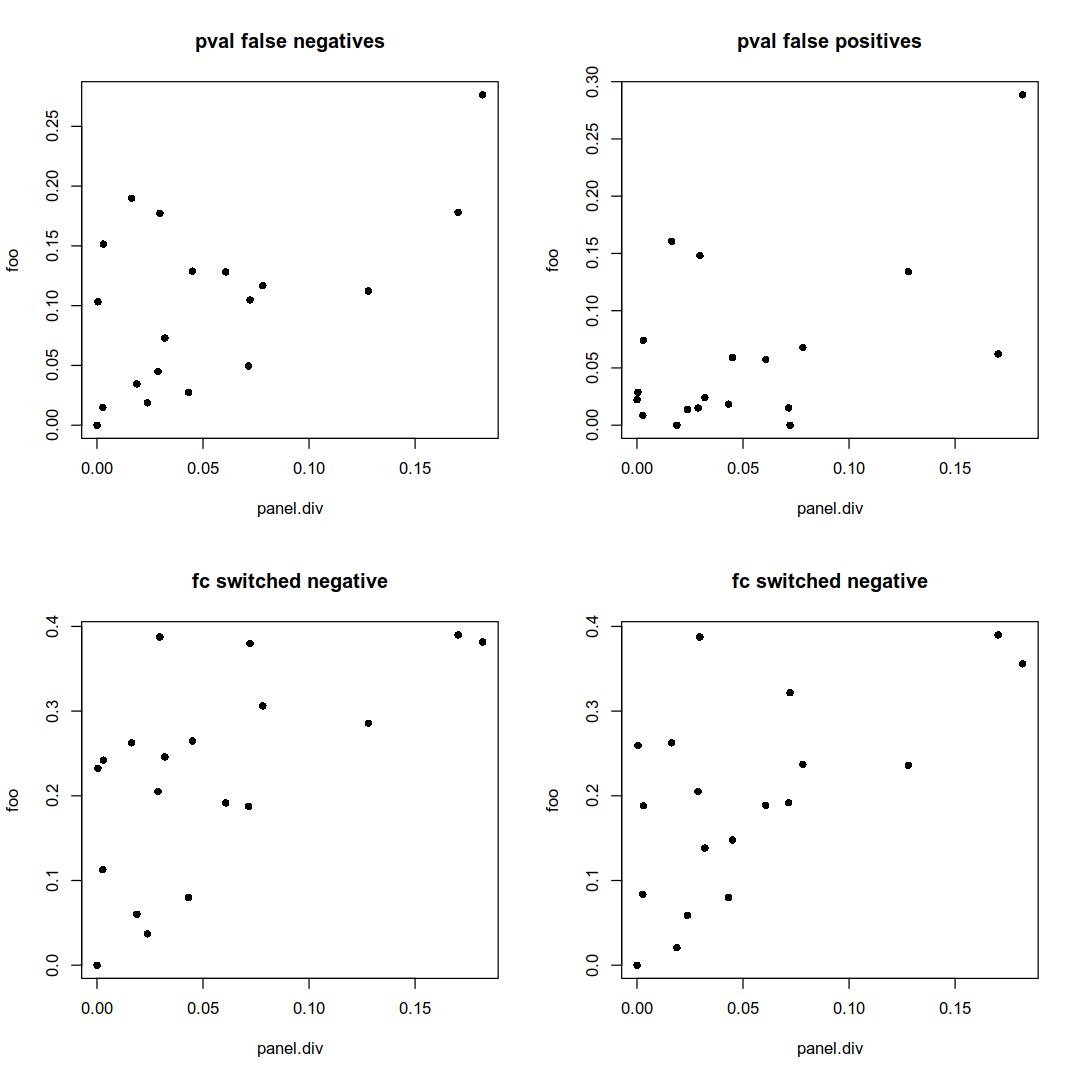

In [49]:
options(repr.plot.width=9, repr.plot.height=9)
par(mfrow = c(2,2))
n <- 'scTransform'
# n <- 'Library Size'

## pval false negatives
foo <- pval.fns[,n]
plot(panel.div, foo, pch = 16, main = 'pval false negatives')
foo <- pval.fps[,n]
plot(panel.div, foo, pch = 16, main = 'pval false positives')

foo <- lfc.sns[,n]
plot(panel.div, foo, pch = 16, main = 'fc switched negative')
foo <- lfc.sps[,n]
plot(panel.div, foo, pch = 16, main = 'fc switched negative')

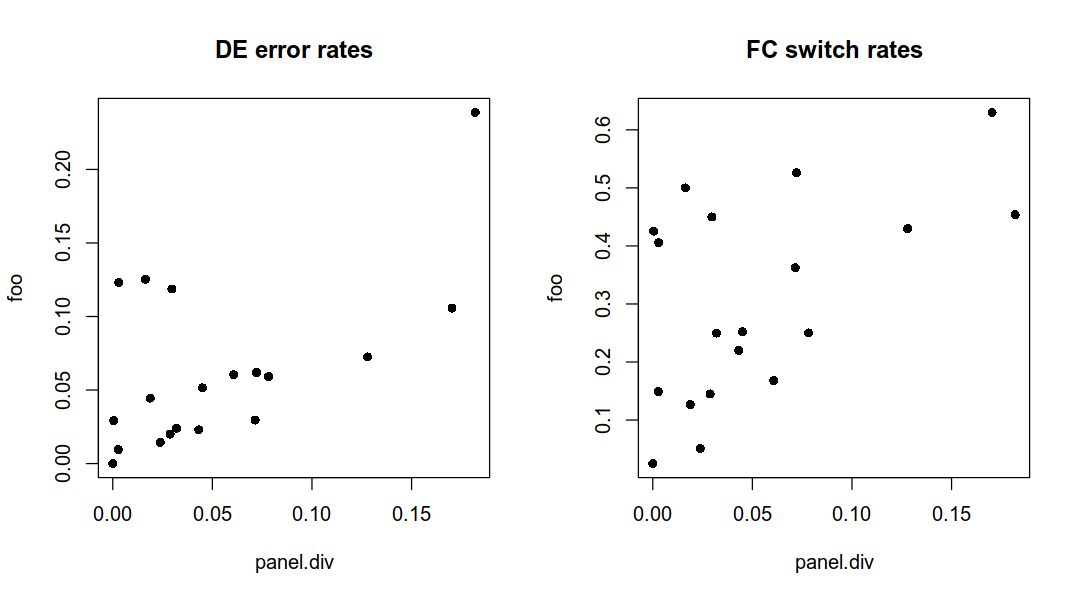

In [50]:
options(repr.plot.width=9, repr.plot.height=5)
par(mfrow = c(1,2))
n <- 'Library Size'

foon <- pval.fns[,n]
foop <- pval.fps[,n]
foo <- rowMeans(cbind(foon, foop))

plot(panel.div, foo, pch = 16, main = 'DE error rates')

foon <- lfc.sns[,n]
foop <- lfc.sps[,n]
foo <- rowMeans(cbind(foon, foop))

plot(panel.div, foo, pch = 16, main = 'FC switch rates')

In [51]:
cor(panel.div, rowMeans(cbind(pval.fns[,n], pval.fps[,n])))
cor(panel.div, rowMeans(cbind(lfc.sns[,n], lfc.sps[,n])))

[1] 0.5870648

[1] 0.5329495

## HEATMAPS

In [53]:
dir.create(paste0(save.dir,'err_heatmaps'))

In [54]:
htmp.col <- colorRampPalette(brewer.pal(9, "YlOrRd"))(100)
htmp.col <- colorRampPalette(brewer.pal(9, "Blues"))(100)
htmp.col <- colorRampPalette(brewer.pal(9, "Purples"))(100)
gs.cols <- brewer.pal(length(n.gs), 'Dark2')
hm.gs.cols <- unlist(sapply(seq_along(gs.cols), function(i) {rep(gs.cols[i],n.gs[i]-1)}))
hm.gs.cols <- c(hm.gs.cols, scales::alpha(gs.cols,0.25))

In [55]:
options(repr.plot.width=9, repr.plot.height=10)
# curr.lmat <- rbind(c(0,3),c(1,2),c(0,4))
# curr.lmat
pdf(paste0(save.dir,'err_heatmaps/pval_fn.pdf'), width = 9, height = 10)
htmp.col <- colorRampPalette(brewer.pal(9, "Purples"))(100)
heatmap.2(t(pval.fns), col = htmp.col, na.color = 'grey', scale = 'none',
          Colv = NA, Rowv = NA, trace = 'none',density.info = 'none', dendrogram = 'none',
          srtCol = 45,
          ColSideColors = hm.gs.cols, labCol = names(panels.order),
          key.title = 'DE false negative rate', key.xlab = '',
         margins = c(10.8,16.1)) #, 
#           lmat = curr.lmat, lhei = c(1.5,4,1.5))
dev.off()

png 
  2

In [56]:
options(repr.plot.width=9, repr.plot.height=10)
# curr.lmat <- rbind(c(0,3),c(1,2),c(0,4))
# curr.lmat
pdf(paste0(save.dir,'err_heatmaps/pval_fp.pdf'), width = 9, height = 10)
htmp.col <- colorRampPalette(brewer.pal(9, "Reds"))(100)
heatmap.2(t(pval.fps), col = htmp.col, na.color = 'grey', scale = 'none',
          Colv = NA, Rowv = NA, trace = 'none',density.info = 'none', dendrogram = 'none',
          srtCol = 45,
          ColSideColors = hm.gs.cols, labCol = names(panels.order),
          key.title = 'DE false positive rate', key.xlab = '',
         margins = c(10.8,16.1)) #, 
#           lmat = curr.lmat, lhei = c(1.5,4,1.5))
dev.off()

png 
  2

In [57]:
options(repr.plot.width=9, repr.plot.height=10)
# curr.lmat <- rbind(c(0,3),c(1,2),c(0,4))
# curr.lmat
pdf(paste0(save.dir,'err_heatmaps/lfc_sn.pdf'), width = 9, height = 10)
htmp.col <- colorRampPalette(brewer.pal(9, "Purples"))(100)
heatmap.2(t(lfc.sns), col = htmp.col, na.color = 'grey', scale = 'none',
          Colv = NA, Rowv = NA, trace = 'none',density.info = 'none', dendrogram = 'none',
          srtCol = 45,
          ColSideColors = hm.gs.cols, labCol = names(panels.order),
          key.title = 'FC switched negative rate', key.xlab = '',
         margins = c(10.8,16.1)) #, 
#           lmat = curr.lmat, lhei = c(1.5,4,1.5))
dev.off()

png 
  2

In [58]:
options(repr.plot.width=9, repr.plot.height=10)
# curr.lmat <- rbind(c(0,3),c(1,2),c(0,4))
# curr.lmat
pdf(paste0(save.dir,'err_heatmaps/lfc_sp.pdf'), width = 9, height = 10)
htmp.col <- colorRampPalette(brewer.pal(9, "Reds"))(100)
heatmap.2(t(lfc.sps), col = htmp.col, na.color = 'grey', scale = 'none',
          Colv = NA, Rowv = NA, trace = 'none',density.info = 'none', dendrogram = 'none',
          srtCol = 45,
          ColSideColors = hm.gs.cols, labCol = names(panels.order),
          key.title = 'FC switched positive rate', key.xlab = '',
         margins = c(10.8,16.1)) #, 
#           lmat = curr.lmat, lhei = c(1.5,4,1.5))
dev.off()

png 
  2

# SCRATCH

In [1]:
options(repr.plot.width=9, repr.plot.height=10)
# pdf(paste0(save.dir,'err_heatmaps/pval_fn.pdf'), width = 9, height = 10)
heatmap.2(as.matrix(pval.fns), na.color = 'grey',
          dendrogram = 'none',keysize = 1, density.info = 'none',
          labRow = names(panels.order), #ColSideColors = hm.gs.cols,
          key.title = NA, key.xlab = 'DE false negative rate',
        Colv = NA, Rowv = NA, col = htmp.col, scale = "none", trace = 'none',
       margins = c(10.8,16.1), lmat=rbind( c(0, 3), c(2,1), c(0,4) ), lhei=c(1, 9, 2))
#           lmat = rbind(c(2,1),c(2,1)), lwid = c(1,1), lhei = c(1,1))
# dev.off()

ERROR: Error in heatmap.2(as.matrix(pval.fns), na.color = "grey", dendrogram = "none", : could not find function "heatmap.2"


In [38]:
?heatmap.2

In [ ]:
## mean exp full panel heatmap
options(repr.plot.width=7, repr.plot.height=5)
pdf(paste0(save.dir,'heatmaps/heatmap_full.pdf'), width = 7, height = 5)
heatmap(hoo.gexp[hm.genes,gs.order], scale = 'row', col = htmp.col, 
        Colv = NA, Rowv = NA, 
        ColSideColors = leg.col.region.og[colnames(hoo.gexp[,gs.order])],
       labRow = FALSE, labCol = FALSE,
        margins = c(3.8,2.1)
       )
title(ylab=paste('Genes\nFull gene panel'), line=0.5, cex.lab=1)
title(xlab=paste('Cells'), line=4, cex.lab=1)
dev.off()